In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms 

In [3]:
EPOCHS = 10 
BATCH_SIZE = 128

In [5]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(DEVICE, torch.cuda.get_device_name(), print(f'torch : {torch.__version__}'))

torch : 1.12.1+cu113
cuda NVIDIA GeForce GTX 1650 None


In [7]:
train_dataset = datasets.CIFAR10(root='../../data/cifar10',
                                 download=True,
                                 train=True,
                                 transform= transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5),
                                                         (0.5, 0.5, 0.5))
                                 ]))
test_dataset = datasets.CIFAR10(root='../../data/cifar10',
                                 download=True,
                                 train=False,
                                 transform= transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5),
                                                         (0.5, 0.5, 0.5))
                                 ]))
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           shuffle=True,
                                           batch_size = BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           shuffle=False,
                                           batch_size = BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
for (X_train, y_train) in train_loader :
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break 

torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.FloatTensor torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

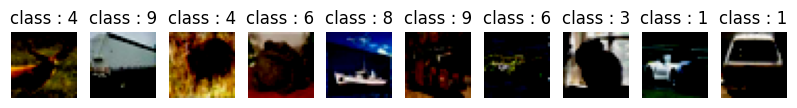

In [10]:
pltsize = 1 
plt.figure(figsize = (pltsize*10, pltsize))
for i in range(10) :
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1,2,0)))
    plt.title(f'class : {y_train[i].item()}')
plt.show()

In [ ]:
class BasicBlock(nn.Moudle) :
    def __init__(self, in_planes, planes, stride) :
        super(BasicBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_planes, planes,
                               kernel_size=3,
                               stride=stride,
                               padding= 1 ,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(planes)

        self.conv2 = nn.Conv2d(planes, planes,
                               kernel_size=3,
                               stride= 1,
                               padding = 1,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()

        if in_planes != planes or stride != 1 :
            
